In [1]:
from __future__ import division

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dd = pd.read_csv('gene_high_throughput_sequencing.csv')
dd.describe()
dd.info()
dd.head()

,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2.463922,7.100958,19.056151,15.618688,23.537120,11.303466,8.921396,63.270147,53.906324,70.678573,...,5.563444,2.192029,1.967424,2.181360,1.729308,1.980733,16.834075,1.825827,2.287380,1.756827
std,1.413687,4.164703,9.287753,4.664146,4.475294,4.055122,3.270713,13.792140,45.635498,21.326237,...,2.389789,2.454218,2.047129,2.542652,1.507149,2.230157,7.126802,1.902716,3.185571,1.623151
min,0.833898,1.231043,4.941211,6.395270,8.520713,2.066576,1.364917,42.544976,24.616767,42.631422,...,1.144240,0.853957,0.853957,0.853957,0.833898,0.833898,4.675683,0.833898,0.853957,0.833898
25%,1.284642,3.892403,13.423946,12.574596,21.151624,8.712898,6.213396,53.093627,34.009687,54.202100,...,3.805875,1.042783,1.011350,1.011350,1.003337,1.003337,11.186633,1.003337,1.011350,1.003337
50%,2.104677,6.315551,16.734855,14.586150,23.477006,11.172590,8.703397,63.230911,39.554954,65.510651,...,5.617824,1.339507,1.273861,1.298543,1.252527,1.252527,16.514389,1.252527,1.273861,1.252527
75%,3.345067,8.916399,21.884325,17.695678,26.471909,13.568625,11.139240,69.880705,50.295756,79.427207,...,7.100942,1.815754,1.647255,1.677971,1.625364,1.611299,21.849385,1.607345,1.647255,1.611299
max,7.364879,20.006038,60.584449,29.659104,34.110743,27.441093,17.121366,132.144503,327.590426,128.606260,...,11.227770,11.913855,10.883310,11.692697,10.392539,10.640754,49.295538,9.919132,17.278985,9.333904


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 15750 entries, Patient_id to EIF1AY
dtypes: float64(15748), object(2)
memory usage: 8.7+ MB


,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [4]:
dd.Diagnosis.value_counts()

early neoplasia    25
normal             24
cancer             23
Name: Diagnosis, dtype: int64

In [5]:
dd_n = dd[(dd['Diagnosis'] == 'normal')]
dd_e = dd[(dd['Diagnosis'] == 'early neoplasia')]
dd_c = dd[(dd['Diagnosis'] == 'cancer')]

<Figure size 864x576 with 0 Axes>

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([0.93806112, 1.00345108, 1.04538239, 1.08411336, 1.25761416,
         1.28299536, 1.47417351, 1.80186544, 2.06657644, 2.07759652,
         2.23457622, 2.55179993, 2.56187094, 2.61361628, 2.87176665,
         2.97120469, 3.15389961, 3.51583385, 3.55822218, 3.69312835,
         3.94227485, 4.56793106, 4.71782188, 7.36487926])),
 (1.4887457724508066, 2.6812772960416664, 0.9429731011787958))

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([0.88537453, 0.94925221, 0.96483677, 0.9790742 , 1.06821015,
         1.12258826, 1.24743999, 1.28519024, 1.40585796, 1.5917473 ,
         1.6798491 , 1.93727047, 2.13175674, 2.42176631, 2.51630528,
         2.88873144, 3.06048091, 3.15531518, 3.38633103, 3.98359271,
         4.39191916, 4.56742531, 4.66823211, 4.730638  , 5.75316457])),
 (1.4660824568896027, 2.5108939967199992, 0.9546214465943991))

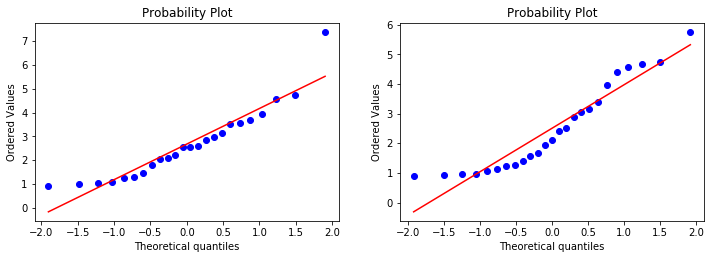

In [6]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(dd_n.LOC643837, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(dd_e.LOC643837, dist="norm", plot=pylab)
pylab.show()

In [8]:
gene_list = dd.columns.to_list()
gene_list.remove('Patient_id')
gene_list.remove('Diagnosis')

In [9]:
len(gene_list)

15748

In [10]:
cnt = 0

for gene in gene_list:
    if stats.ttest_ind(dd_n[gene], dd_e[gene], equal_var = False)[1] < 0.05:
        cnt += 1

In [11]:
cnt

1575

In [12]:
cnt_2 = 0

for gene in gene_list:
    if stats.ttest_ind(dd_e[gene], dd_c[gene], equal_var = False)[1] < 0.05:
        cnt_2 += 1

In [13]:
cnt_2

3490

In [14]:
def write_answer_1(ans):
    with open("task1_ans/t1_ans1.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer_2(ans):
    with open("task1_ans/t1_ans2.txt", "w") as fout:
        fout.write(str(ans))

In [15]:
write_answer_1(cnt)
write_answer_2(cnt_2)

In [16]:
import statsmodels.stats.multitest as smm

In [17]:
def fold_change(control, test):
    T = test.mean()
    C = control.mean()
    if (T > C):
        return T / C
    else:
        return -C / T

In [19]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [18]:
#reject, p_corrected, a1, a2 = multipletests(sales_correlation.p, 
#                                            alpha = 0.05, 
#                                            method = 'holm')

NameError: name 'multipletests' is not defined

In [23]:
p_list1 = []

for gene in gene_list:
    p_list1.append(stats.ttest_ind(dd_n[gene], dd_e[gene], equal_var = False)[1])
    
reject, p_c_list1, a1, a2 = multipletests(p_list1, alpha = 0.025, method = 'holm')

for i in np.arange(len(p_c_list1)):
    if abs(fold_change(dd_n[gene_list[i]], dd_e[gene_list[i]])) <= 1.5:
        p_c_list1[i] = 2

In [24]:
cnt3 = 0

for p_v in p_c_list1:
    if p_v < 0.025:
        cnt3 += 1

In [27]:
def write_answer_3(ans):
    with open("task1_ans/t1_ans3.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer_4(ans):
    with open("task1_ans/t1_ans4.txt", "w") as fout:
        fout.write(str(ans))

In [28]:
write_answer_3(cnt3)

In [29]:
p_list2 = []

for gene in gene_list:
    p_list2.append(stats.ttest_ind(dd_e[gene], dd_c[gene], equal_var = False)[1])
    
reject, p_c_list2, a1, a2 = multipletests(p_list2, alpha = 0.025, method = 'holm')

for i in np.arange(len(p_c_list2)):
    if abs(fold_change(dd_e[gene_list[i]], dd_c[gene_list[i]])) <= 1.5:
        p_c_list2[i] = 2
        
cnt4 = 0

for p_v in p_c_list2:
    if p_v < 0.025:
        cnt4 += 1
        
write_answer_4(cnt4)

In [30]:
def write_answer_5(ans):
    with open("task1_ans/t1_ans5.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer_6(ans):
    with open("task1_ans/t1_ans6.txt", "w") as fout:
        fout.write(str(ans))

In [31]:
reject, p_c2_list1, a1, a2 = multipletests(p_list1, alpha = 0.025, method = 'fdr_bh')

for i in np.arange(len(p_c2_list1)):
    if abs(fold_change(dd_n[gene_list[i]], dd_e[gene_list[i]])) <= 1.5:
        p_c2_list1[i] = 2
        
cnt5 = 0

for p_v in p_c2_list1:
    if p_v < 0.025:
        cnt5 += 1

In [32]:
write_answer_5(cnt5)

In [33]:
reject, p_c2_list2, a1, a2 = multipletests(p_list2, alpha = 0.025, method = 'fdr_bh')

for i in np.arange(len(p_c2_list2)):
    if abs(fold_change(dd_e[gene_list[i]], dd_c[gene_list[i]])) <= 1.5:
        p_c2_list2[i] = 2
        
cnt6 = 0

for p_v in p_c2_list2:
    if p_v < 0.025:
        cnt6 += 1
        
write_answer_6(cnt6)